<a href="https://colab.research.google.com/github/yashrajkakkad/ml-spotify/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [10]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [3]:
df = pd.read_csv('/Users/ningyuhang/Desktop/EECS545/project/data/data_merged_quartile.csv')
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,Minor,Major
0,0.0,0.01270,0.622,218293.0,0.890,0.950000,0.124,-7.043,0.0300,115.002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.00306,0.620,215613.0,0.755,0.011800,0.534,-4.617,0.0345,127.994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.02540,0.774,166875.0,0.700,0.002530,0.157,-4.498,0.2390,128.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.00465,0.638,222369.0,0.587,0.909000,0.157,-6.266,0.0413,145.036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.02890,0.572,214408.0,0.803,0.000008,0.106,-4.294,0.3510,149.995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
df.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5',
       'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'genre_0',
       'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6',
       'genre_7', 'genre_8', 'genre_9', 'Minor', 'Major'],
      dtype='object')

In [5]:
# mean_popularity = 42
# df["popularity"] = [ 1 if i >= mean_popularity else 0 for i in df.popularity ]
df.popularity.value_counts()  

0.0    10656
2.0    10651
1.0    10044
3.0     9205
Name: popularity, dtype: int64

In [6]:
y = df["popularity"].values
X = df.drop(["popularity", "loudness", "loudness", "loudness"],axis=1)

In [7]:
X.shape, y.shape

((40556, 33), (40556,))

In [18]:

y = y.astype(int)
from sklearn.feature_selection import SelectPercentile, chi2
X = SelectPercentile(chi2, percentile=60).fit_transform(X, y)

input_scaler = StandardScaler()
X_normalized = input_scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.20, random_state=42, stratify=y
)

In [19]:

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

class_weights = len(y_train) / (4.0 * np.bincount(y_train))

sample_weights = np.array([class_weights[label] for label in y_train])


svm = SVC(kernel='linear',
          C=1,
          random_state=42, verbose=1)

# svm = SVC(kernel='rbf', C=5, gamma='scale', decision_function_shape='ovr', verbose=1)

svm.fit(X_train, y_train, sample_weight=sample_weights)

print("Train accuracy of svm algo:", svm.score(X_train, y_train))
print("Test accuracy of svm algo:", svm.score(X_test, y_test))

# cv_scores = cross_val_score(svm, X_train[:20000], y_train[:20000])
# print("Cross Validation scores - ", cv_scores)

# y_train_pred = cross_val_predict(svm, X_train[:20000], y_train[:20000])

# confusion_matrix = confusion_matrix(y_train[:20000], y_train_pred)
# print("Confusion matrix\n", confusion_matrix)

# p_score = precision_score(y_train[:20000], y_train_pred)
# rc_score = recall_score(y_train[:20000], y_train_pred)
# f1_score = f1_score(y_train[:20000], y_train_pred)
# p_score, rc_score, f1_score
# print("Recall score = ", rc_score)
# print("Precision score = ", p_score)
# print("F1 score = ", f1_score)

y_pred = svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Classification report\n")
print(classification_report(y_test, y_pred))

[LibSVM]..............
**.
*
optimization finished, #iter = 14481
obj = -11812.216980, rho = 0.799595
nSV = 12138, nBSV = 6848
...............
*......
*..
*
optimization finished, #iter = 21968
obj = -10980.260620, rho = 0.640886
nSV = 11539, nBSV = 5985
.............
*...
*..
*
optimization finished, #iter = 18533
obj = -10605.072613, rho = 0.526120
nSV = 10389, nBSV = 6418
..................
*.
*.
*.
*
optimization finished, #iter = 18857
obj = -15185.100858, rho = 0.343360
nSV = 15500, nBSV = 8698
................
*.
*
optimization finished, #iter = 16674
obj = -14678.416511, rho = 0.203250
nSV = 13936, nBSV = 7235
................
*
optimization finished, #iter = 16910
obj = -15864.326560, rho = 0.141533
nSV = 15536, nBSV = 8236
Total nSV = 29939
Train accuracy of svm algo: 0.33818271483171003
Test accuracy of svm algo: 0.33789447731755423
[[ 675  276  178 1003]
 [  92  230  199 1488]
 [  21  132  198 1779]
 [   3   69  131 1638]]
Classification report

              precision    r

In [17]:
print(y_test[0])

0


Fraction of correctly ordered pairs: 0.7429109529829824


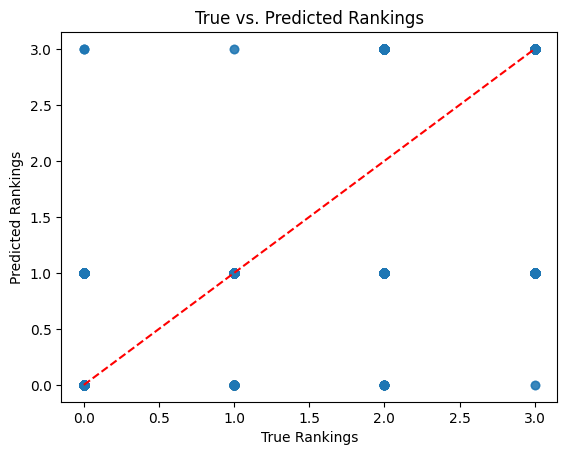

In [15]:
# Calculate the fraction of correctly ordered pairs && Ranking SVM
n_correct = 0
n_pairs = 0
for i in range(len(y_test)):
    for j in range(i + 1, len(y_test)):
        if (y_test[i] < y_test[j]) == (y_pred[i] < y_pred[j]):
            n_correct += 1
        n_pairs += 1

print(f'Fraction of correctly ordered pairs: {n_correct / n_pairs}')

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Rankings')
plt.ylabel('Predicted Rankings')
plt.title('True vs. Predicted Rankings')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()